# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
data = pd.read_csv("marketing_sales_data.csv")

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [5]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [6]:
data.shape

(572, 5)

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [8]:
data.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [13]:
data.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [18]:
new_data = data.dropna(axis=0)
new_data.isnull()

0

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

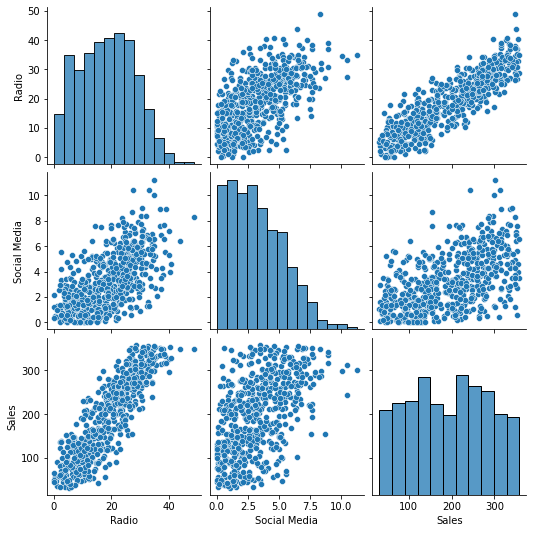

In [19]:
# Create plot of pairwise relationships.

sns.pairplot(new_data)


**Question:** Is the assumption of linearity met?

It seems that there is a positive relation between the two variables, Since the points cluster around a line, it seems the assumption of linearity is met.

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [24]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data = new_data[['Radio', 'Sales']]

ols_data.head()

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328


Write the linear regression formula for modeling the relationship between the two variables of interest.

implement the ordinary least squares (OLS) approach for linear regression.

In [32]:
# Implement OLS.

ols_formula = 'Sales ~ Radio'

OLS = ols(formula =ols_formula , data=ols_data)

model = OLS.fit()
model_result = model.summary()

model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          2.07e-176
Time:                        10:08:08   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is the y-intercept? 

41.5326

**Question:** What is the slope? 

8.1733

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


Sales = 8.1733 X + 41.5326

**Question:** What does the slope mean in this context?

For every unit increase in X `Radio` there is 41.5326 increase in Y unit `Sales`

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

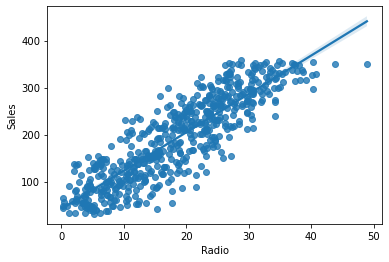

In [34]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x=radio, y=sales)


**Question:** What do you observe from the preceding regression plot?

The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

Now, check the normality assumption. Get the residuals from the model.

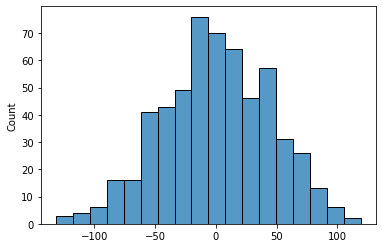

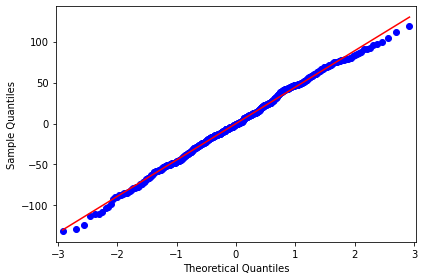

In [42]:
# Get the residuals from the model.

residuals = model.resid

sns.histplot(residuals)

sm.qqplot(residuals, line='s')
plt.tight_layout()

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

**Question:** Is the assumption of normality met?

In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

Text(0, 0.5, 'Residuals')

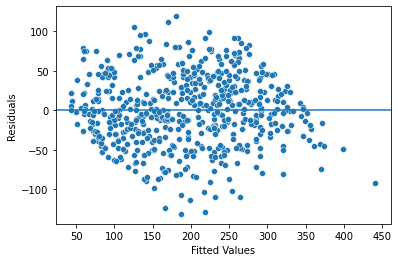

In [53]:
# Get fitted values.

x = ols_data['Radio']
fitted_values = model.predict(x)

ftre = sns.scatterplot(x=fitted_values, y=residuals)
ftre.axhline(0)
ftre.set_xlabel('Fitted Values')
ftre.set_ylabel('Residuals')

**Question:** Are the assumptions of independent observation and homoscedasticity met?


In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.

The results of a linear regression model can be used to express the relationship between two variables.